In [1]:
import numpy as np
import scipy as sp
import ot 
import networkx as nx
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from constants import ROOT_DIR

# setting the path of this notebook to the root directory
sys.path.append(ROOT_DIR)
# import libraries custom in this repository
import methods.DataIO as DataIO
import methods.GromovWassersteinFramework as GWL
import dev.generate_util as Gen

sns.set()
%matplotlib inline

2023-01-23 10:57:02.742593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cycle_g = nx.Graph(Gen.gen_cycle_graph(5))
line_g = nx.Graph(Gen.gen_line_graph(5))

mat = np.full((7, 7), 0)
mat[0, 1] = 1
mat[1, 2] = 1
mat[2, 3] = 1
mat[3, 4] = 1
mat[3, 5] = 1
mat[5, 6] = 1
mat = mat + mat.T
custom_g = nx.Graph(mat)

In [3]:
def gw_trans_wrapper(epsilon, graph, undirected = True, mode = 1, imshow = True, verbose = True, viz_graph = False): 
    # extract graph info
    p_s, cost_s, _ = DataIO.extract_graph_info(graph)
    p_s /= np.sum(p_s)
    if undirected: 
        cost_s = cost_s + cost_s.T
    cost_s = cost_s.toarray()
    if viz_graph: 
        nx.draw(nx.Graph(cost_s))
    plt.figure()
    if mode == 1: 
        gw_dist, log = ot.gromov.entropic_gromov_wasserstein2(cost_s, cost_s, list(p_s.flatten()), list(p_s.flatten()), 
                        "square_loss", epsilon=epsilon, log = True)
        trans = log["T"]
    elif mode == 0: 
        trans, log = ot.gromov.entropic_gromov_wasserstein(cost_s, cost_s, list(p_s.flatten()), list(p_s.flatten()), 
                        "square_loss", epsilon=epsilon, log = True)
        gw_dist = log["gw_dist"]
    if verbose: 
        print(f"Epsilon: {epsilon}")
        print(f"GW Distance: {gw_dist}")
        print("Transport Matrix:")
        print(trans)
    if imshow: 
        plt.imshow(trans)
        plt.colorbar()
    return (epsilon, gw_dist, trans)

Epsilon: 0.01
GW Distance: 0.48000000000000004
Transport Matrix:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


(0.01,
 0.48000000000000004,
 array([[0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04]]))

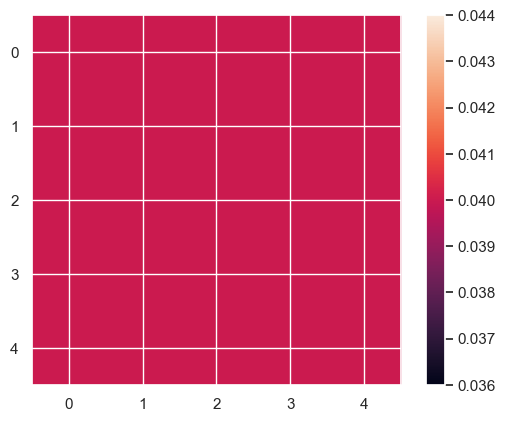

In [4]:
gw_trans_wrapper(0.01, cycle_g)

Epsilon: 0.01
GW Distance: 1.359473361693304e-18
Transport Matrix:
[[2.00000000e-01 1.53352961e-53 1.53352961e-53 8.49670851e-19
  3.60970278e-36]
 [1.53352961e-53 2.00000000e-01 3.60970278e-36 3.60970278e-36
  8.49670851e-19]
 [1.53352961e-53 3.60970278e-36 2.00000000e-01 3.60970278e-36
  8.49670851e-19]
 [8.49670851e-19 3.60970278e-36 3.60970278e-36 2.00000000e-01
  8.49670851e-19]
 [3.60970278e-36 8.49670851e-19 8.49670851e-19 8.49670851e-19
  2.00000000e-01]]


/usr/local/anaconda3/envs/kai_env/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


(0.01,
 1.359473361693304e-18,
 array([[2.00000000e-01, 1.53352961e-53, 1.53352961e-53, 8.49670851e-19,
         3.60970278e-36],
        [1.53352961e-53, 2.00000000e-01, 3.60970278e-36, 3.60970278e-36,
         8.49670851e-19],
        [1.53352961e-53, 3.60970278e-36, 2.00000000e-01, 3.60970278e-36,
         8.49670851e-19],
        [8.49670851e-19, 3.60970278e-36, 3.60970278e-36, 2.00000000e-01,
         8.49670851e-19],
        [3.60970278e-36, 8.49670851e-19, 8.49670851e-19, 8.49670851e-19,
         2.00000000e-01]]))

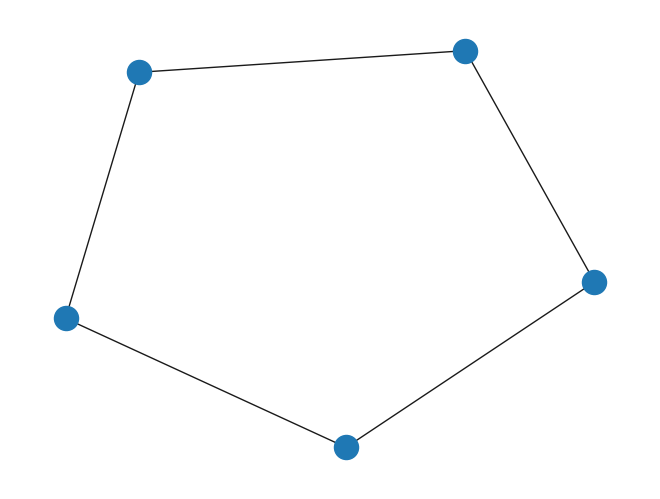

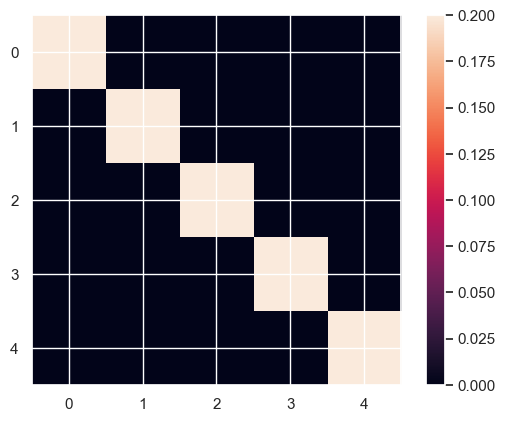

In [5]:
gw_trans_wrapper(0.01, cycle_g, undirected=False, viz_graph=True)

Epsilon: 0.01
GW Distance: 3.254969962402597e-12
Transport Matrix:
[[1.25000000e-01 9.30018994e-45 9.30018995e-45 6.69659241e-34
  2.41093731e-23]
 [4.65009497e-45 2.50000000e-01 9.30018995e-45 6.69659241e-34
  2.41093731e-23]
 [4.65009497e-45 9.30018994e-45 2.50000000e-01 6.69659242e-34
  2.41093731e-23]
 [3.34829620e-34 6.69659240e-34 6.69659242e-34 2.50000000e-01
  1.73599298e-12]
 [2.41093731e-23 4.82187462e-23 4.82187462e-23 3.47198597e-12
  1.25000000e-01]]


(0.01,
 3.254969962402597e-12,
 array([[1.25000000e-01, 9.30018994e-45, 9.30018995e-45, 6.69659241e-34,
         2.41093731e-23],
        [4.65009497e-45, 2.50000000e-01, 9.30018995e-45, 6.69659241e-34,
         2.41093731e-23],
        [4.65009497e-45, 9.30018994e-45, 2.50000000e-01, 6.69659242e-34,
         2.41093731e-23],
        [3.34829620e-34, 6.69659240e-34, 6.69659242e-34, 2.50000000e-01,
         1.73599298e-12],
        [2.41093731e-23, 4.82187462e-23, 4.82187462e-23, 3.47198597e-12,
         1.25000000e-01]]))

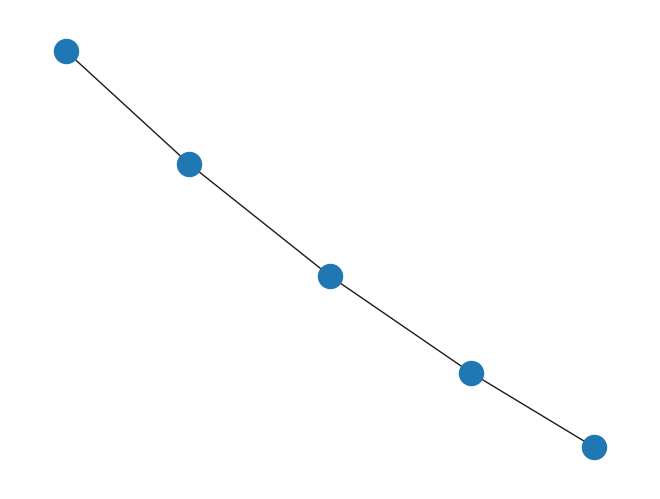

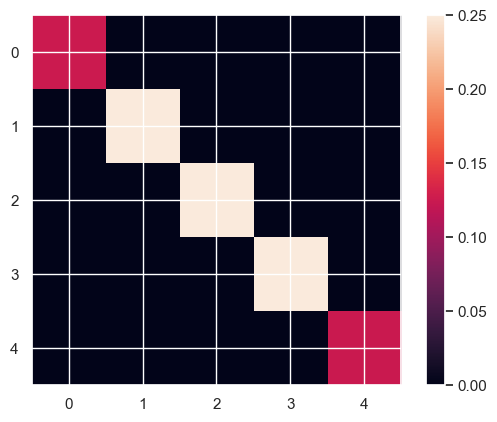

In [6]:
gw_trans_wrapper(0.01, line_g, undirected=False, viz_graph=True)

In [13]:
def gwf_diff_experiment(gen_func, gen_func_name, base_sizes, n_experiments, colors, verbose = False, undirected = True, increments = 1): 

    plt.figure(figsize=(5, 5))
    plt.xlabel('Difference in Size')
    plt.ylabel('GW discrepancy')
    plt.title(gen_func_name)

    for num_base in range(len(base_sizes)): 
        # initialize storage vector for experimental results
        results_mean = np.zeros(n_experiments)
        results_std = np.zeros(n_experiments)

        # initialize base graph 
        base_size = base_sizes[num_base]
        if verbose: 
            print(f"Operating with base size = {base_size} --------------------------------")
        base_graph = nx.Graph(gen_func(base_size))
        p_s, cost_s, _ = DataIO.extract_graph_info(base_graph)
        p_s /= np.sum(p_s) 
        if undirected: 
            cost_s = cost_s + cost_s.T
        cost_s = cost_s.toarray()

        for i in range(n_experiments): 
            # create a new instance of graph with INCREMENT larger size 
            # than the previous iteration
            new_size = base_size + i * increments
            new_graph = nx.Graph(gen_func(new_size))
            p_t, cost_t, _ = DataIO.extract_graph_info(new_graph)
            p_t /= np.sum(p_t)
            if undirected: 
                cost_t = cost_t + cost_t.T
            cost_t = cost_t.toarray()
            # compute gromov-wasserstein differential between base graph and new graph
            gw_dist = ot.gromov.entropic_gromov_wasserstein2(cost_s, cost_t, list(p_s.flatten()), list(p_t.flatten()), "square_loss", 0.01)
            # store the mean and SDs 
            results_mean[i] = np.mean(gw_dist)

            # print progression bars 
            if verbose: 
                if np.round(n_experiments * 0.25) == i: 
                    print("25%===>")
                elif np.round(n_experiments * 0.50) == i: 
                    print("50%=========>")
                elif np.round(n_experiments * 0.75) == i: 
                    print("75%=================>")

        # visualize the results for current base size
        plt.plot(range(n_experiments), results_mean, label=f"Base size = {base_size}", color=colors[num_base])

    plt.legend()


In [15]:
BASE_SIZES = [10, 25, 50]
NUM_EXP = 50
COLORS = ["blue", "orange", "green", "red", "purple"]

Operating with base size = 10 --------------------------------
25%===>
50%=========>
75%=================>
Operating with base size = 25 --------------------------------
25%===>
50%=========>
75%=================>
Operating with base size = 50 --------------------------------
25%===>
50%=========>
75%=================>


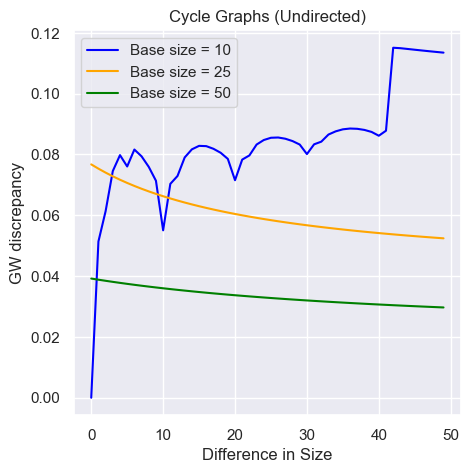

In [16]:
gwf_diff_experiment(Gen.gen_cycle_graph, "Cycle Graphs (Undirected)", BASE_SIZES, NUM_EXP, COLORS, verbose=True, undirected=False)